# Results for TENCON 2024 paper
## Experiment 2: Impact of Swarm Size

#### Title: Performance Analysis of Selected Swarm-based Robot Search Algorithms for Target Tracking 

#### Authors:

Christian C. Anabeza,
Marck Herzon C. Barrion,
Matthea Flynne T. Sim,
Argel A. Bandala

## Line Plots with Error Bars for Impact of Swarm Size

Processing Random Walk with swarm size 1 in /home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_1bot_20targets
Processing Random Walk with swarm size 10 in /home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets
Processing Random Walk with swarm size 20 in /home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_20bots_20targets
Processing Random Walk with swarm size 30 in /home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_30bots_20targets
Processing Levy Flight with swarm size 1 in /home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_1bot_20targets
Processing Levy Flight with swarm size 10 in /home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_10bots_20targets
Processing Levy Flight with swarm size 20 in /home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_20bots_20targets
Processing Levy Flight with swarm size 30 in /home/herzon/results-thesis/subthesis

/tmp/ipykernel_4595/3387090633.py:108: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Swarm Size', y='Accuracy', data=df, ci=None, marker='o', label=algorithm, color=darker_palette[algorithm])


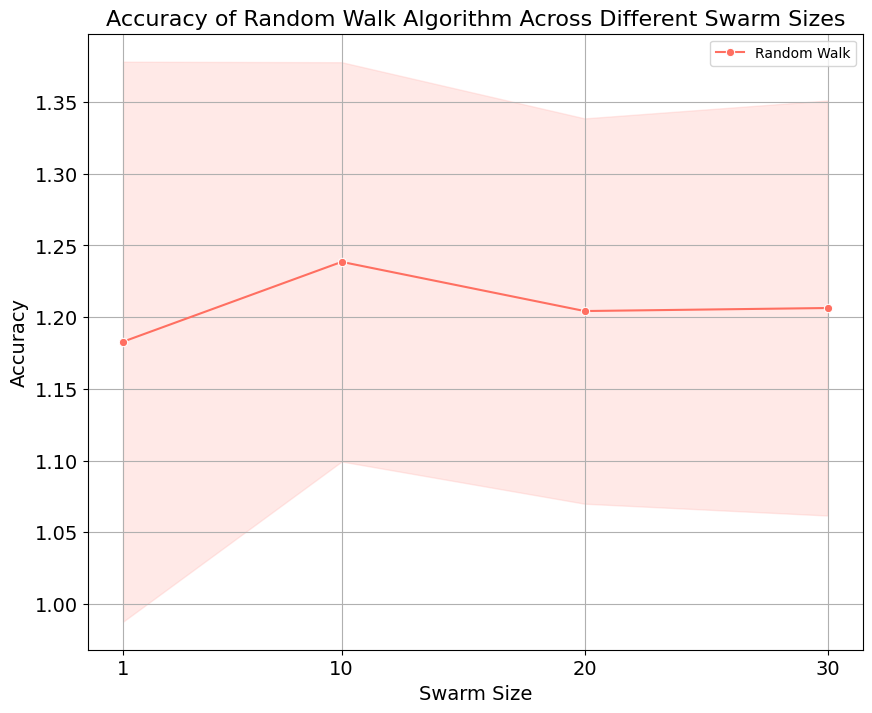


Descriptive statistics for Levy Flight:
            count      mean       std       min       25%       50%       75%  \
Swarm Size                                                                      
1            10.0  1.272185  0.133393  1.047101  1.241008  1.291877  1.361111   
10          110.0  1.233793  0.143607  0.907328  1.103242  1.222477  1.355862   
20          260.0  1.242596  0.196351  0.931034  1.106661  1.223829  1.351180   
30          360.0  1.242117  0.160795  0.876603  1.112280  1.232577  1.371550   

                 max  
Swarm Size            
1           1.451389  
10          1.499998  
20          2.942672  
30          2.125875  


/tmp/ipykernel_4595/3387090633.py:108: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Swarm Size', y='Accuracy', data=df, ci=None, marker='o', label=algorithm, color=darker_palette[algorithm])


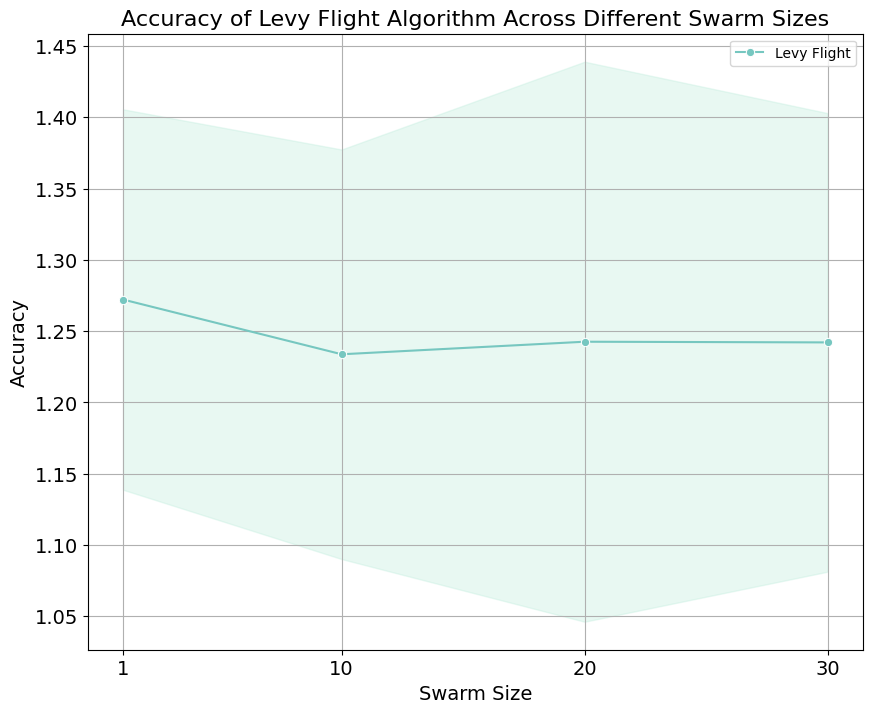


Descriptive statistics for Brownian Motion:
            count      mean       std       min       25%       50%       75%  \
Swarm Size                                                                      
1            20.0  1.416250  0.289440  1.083333  1.239583  1.375000  1.500000   
10          200.0  1.278017  0.161366  0.977273  1.152083  1.277778  1.392262   
20          220.0  1.260911  0.144599  1.011111  1.142468  1.262500  1.375000   
30           90.0  1.254026  0.151944  1.002778  1.133198  1.250000  1.359375   

                 max  
Swarm Size            
1           2.000000  
10          1.888889  
20          1.861111  
30          1.750000  


/tmp/ipykernel_4595/3387090633.py:108: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Swarm Size', y='Accuracy', data=df, ci=None, marker='o', label=algorithm, color=darker_palette[algorithm])


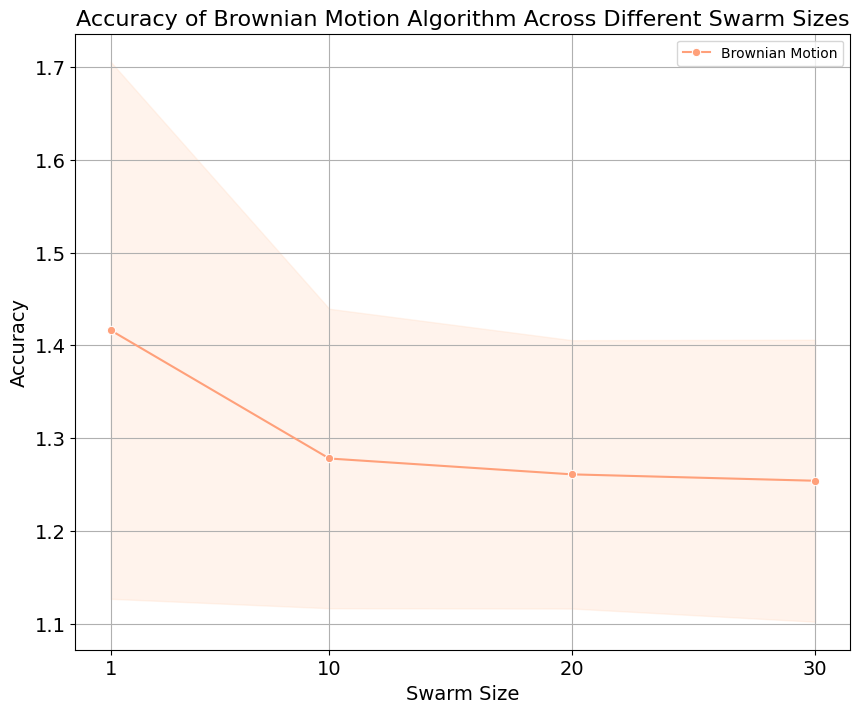


Descriptive statistics for Correlated Random Walk:
            count      mean       std       min       25%       50%       75%  \
Swarm Size                                                                      
1            20.0  0.907740  0.267962  0.578993  0.592028  1.068694  1.134433   
10          199.0  1.136403  0.102873  1.001836  1.065124  1.120754  1.190813   
20          200.0  1.084972  0.144792  0.618547  1.053659  1.115218  1.178691   
30          270.0  1.062702  0.161513  0.595756  1.030693  1.091006  1.173418   

                 max  
Swarm Size            
1           1.211448  
10          1.669902  
20          1.246454  
30          1.309281  


/tmp/ipykernel_4595/3387090633.py:108: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Swarm Size', y='Accuracy', data=df, ci=None, marker='o', label=algorithm, color=darker_palette[algorithm])


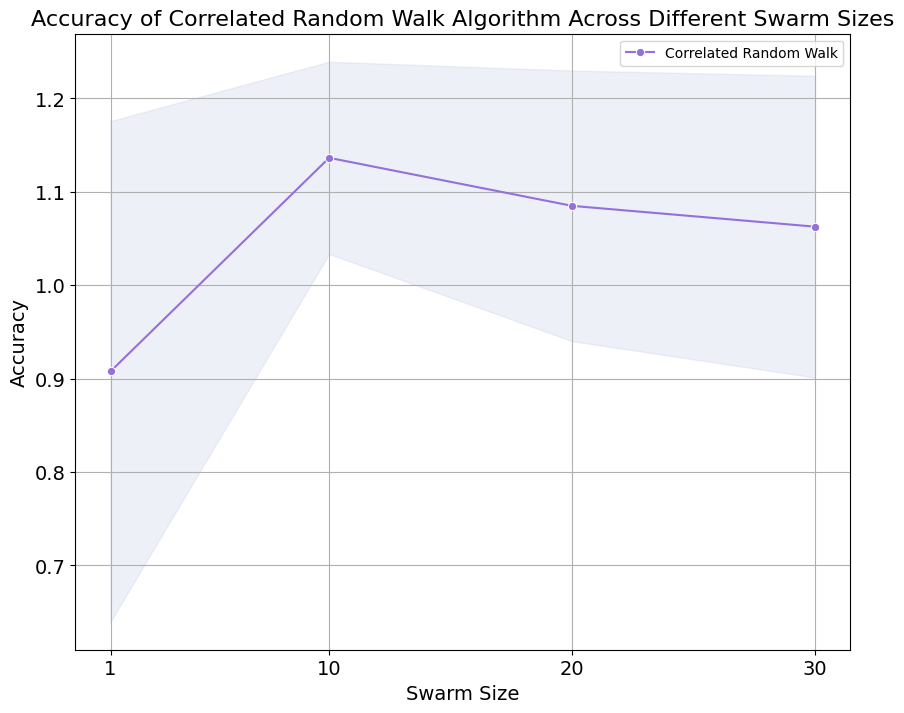

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

# Function to read accuracy data from a given directory
def read_accuracy_data(base_dir, actual_black_tiles, skip_lines=False):
    accuracies = []
    # Find all subdirectories in the base directory
    sub_dirs = [os.path.join(base_dir, d) for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

    for sub_dir in sub_dirs:
        # Find all files that match the pattern e-puck*.csv in each subdirectory
        csv_files = glob.glob(os.path.join(sub_dir, 'e-puck*.csv'))
        
        # Debug print to check if files are being found
        # print(f"Found {len(csv_files)} files in {sub_dir}")

        for run_path in csv_files:
            if os.path.isfile(run_path):
                try:
                    if skip_lines:
                        df = pd.read_csv(run_path, skip_blank_lines=True)
                    else:
                        df = pd.read_csv(run_path)

                    final_average_count = df['average_count'].iloc[-1]
                    accuracy = final_average_count / actual_black_tiles
                    accuracies.append(accuracy)
                except Exception as e:
                    print(f"Error reading {run_path}: {e}")
    
    return accuracies

# Directories for each algorithm and swarm size
algorithms_dirs = {
    "Random Walk": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_1bot_20targets",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_20bots_20targets",
        30: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_30bots_20targets"
    },
    "Levy Flight": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_1bot_20targets",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_10bots_20targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_20bots_20targets",
        30: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_30bots_20targets"
    },
    "Brownian Motion": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_1bot_20targets",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_10bots_20targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_20bots_20targets",
        30: "/home/herzon/results-thesis/subthesis-3/raw_files/brownian_motion/outputs_30bots_20targets"
    },
    "Correlated Random Walk": {
        1: "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_1bot_20targets",
        10: "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_10bots_20targets",
        20: "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_20bots_20targets",
        30: "/home/herzon/results-thesis/subthesis-3/raw_files/correlated_rw/outputs_30bots_20targets"
    }
}

# Actual number of black tiles
actual_black_tiles = 20

# Collect accuracy data for each algorithm
all_data = {algorithm: [] for algorithm in algorithms_dirs}

for algorithm, swarm_sizes in algorithms_dirs.items():
    for swarm_size, dir_path in swarm_sizes.items():
        print(f"Processing {algorithm} with swarm size {swarm_size} in {dir_path}")
        accuracies = read_accuracy_data(dir_path, actual_black_tiles, skip_lines=(algorithm in ["Random Walk", "Levy Flight"]))
        for accuracy in accuracies:
            all_data[algorithm].append({"Swarm Size": swarm_size, "Accuracy": accuracy})

# Create DataFrames from the collected data
df_all = {algorithm: pd.DataFrame(data) for algorithm, data in all_data.items()}

# Define a pastel color palette
pastel_palette = {
    "Random Walk": "#FFB7B2",  # Light pink
    "Levy Flight": "#B5EAD7",  # Light mint green
    "Brownian Motion": "#FFDAC1",  # Light peach
    "Correlated Random Walk": "#C7CEEA"  # Light lavender
}

# Define a darker color palette for the lines
darker_palette = {
    "Random Walk": "#FF6F61",  # Darker pink
    "Levy Flight": "#76C7C0",  # Darker mint green
    "Brownian Motion": "#FFA07A",  # Darker peach
    "Correlated Random Walk": "#9370DB"  # Darker lavender
}

# Collect all descriptive statistics
descriptive_stats_list = []

# Plotting the accuracies for each algorithm and printing descriptive stats
for algorithm, df in df_all.items():
    # Print descriptive statistics
    print(f"\nDescriptive statistics for {algorithm}:")
    stats = df.groupby('Swarm Size')['Accuracy'].describe()
    print(stats)
    descriptive_stats_list.append(stats)

    plt.figure(figsize=(10, 8))
    sns.lineplot(x='Swarm Size', y='Accuracy', data=df, ci=None, marker='o', label=algorithm, color=darker_palette[algorithm])

    # Adding error bars
    means = df.groupby('Swarm Size')['Accuracy'].mean()
    stds = df.groupby('Swarm Size')['Accuracy'].std()
    plt.fill_between(means.index, means - stds, means + stds, color=pastel_palette[algorithm], alpha=0.3)

    plt.title(f'Accuracy of {algorithm} Algorithm Across Different Swarm Sizes', fontsize=16)
    plt.xlabel('Swarm Size', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.grid(True)
    plt.xticks(ticks=[1, 10, 20, 30], fontsize=14)
    plt.yticks(fontsize=14)

    # Save the figure
    save_path = f'/home/herzon/results-thesis/subthesis-3/final_plots/2_{algorithm.replace(" ", "_").lower()}.png'
    plt.savefig(save_path, format='png', dpi=1200)

    plt.show()

# Combine all descriptive statistics into a single DataFrame
combined_stats = pd.concat(descriptive_stats_list, keys=algorithms_dirs.keys())
combined_stats.to_csv('/home/herzon/results-thesis/subthesis-3/final_descriptive_stats/2_stats.csv')
